In [4]:

import pandas as pd 
import numpy as np 
import matplotlib as plt 
%matplotlib inline 
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
import csv
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



In [5]:
DF = pd.read_csv("https://raw.githubusercontent.com/HanaTarek/crab_project/main/crab_project/CrabAgePrediction.csv")
DF

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [6]:
G = 'I'
df = DF[DF['Sex'] != G]
df


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
...,...,...,...,...,...,...,...,...,...
3885,F,1.1875,0.9500,0.3375,13.777857,4.918638,1.984465,5.244657,7
3886,F,1.3250,1.0250,0.3625,23.402512,10.631063,5.783298,6.945627,9
3887,F,1.7500,1.3750,0.4250,47.740558,21.361348,9.256112,9.071840,11
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,2660.0,1.423943,0.239300,0.387500,1.287500,1.462500,1.587500,2.037500
Diameter,2660.0,1.116198,0.196878,0.275000,1.000000,1.150000,1.250000,1.625000
Height,2660.0,0.386114,0.094031,0.037500,0.337500,0.387500,0.437500,2.825000
Weight,2660.0,28.817475,12.821337,0.439417,19.855281,28.462898,36.560224,80.101512
Shucked Weight,2660.0,12.421792,5.989869,0.184272,8.093782,12.232809,16.063535,42.184056
Viscera Weight,2660.0,6.307034,2.880555,0.085048,4.323299,6.166016,8.136306,21.545620
Shell Weight,2660.0,8.260565,3.642927,0.141747,5.808104,8.079607,10.347568,28.491248
Age,2660.0,10.915038,3.058831,3.000000,9.000000,10.000000,12.000000,29.000000


In [8]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [9]:
df['Sex'].mode()

0    M
dtype: object

In [10]:
df['Length'].mode()
df[ 'Length'].median()

1.4625

In [11]:
df['Diameter'].mode()
df[ 'Diameter'].median()

1.15

In [12]:
df['Height'].mode()
df[ 'Height'].median()

0.3875

In [13]:
df['Shucked Weight'].mode()
df[ 'Shucked Weight'].median()

12.23280925

In [14]:
df['Viscera Weight'].mode()
df[ 'Viscera Weight'].median()

6.16601625

In [15]:
df['Shell Weight'].mode()
df[ 'Shell Weight'].median()

8.0796075

In [16]:
df['Age'].mode()
df[ 'Age'].median()

10.0

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

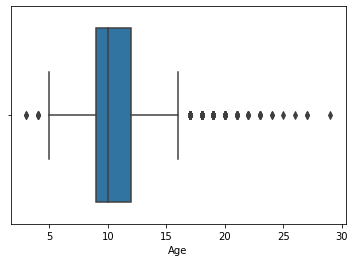

In [17]:
sb.boxplot(df['Age'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

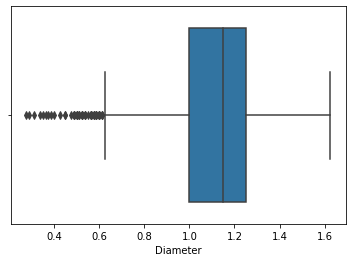

In [18]:
sb.boxplot(df['Diameter'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

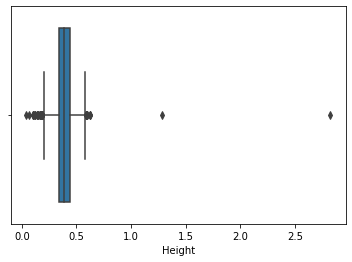

In [19]:
sb.boxplot(df['Height'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

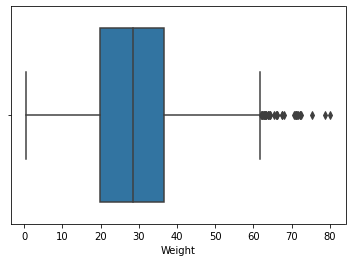

In [20]:
sb.boxplot(df['Weight'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked Weight'>

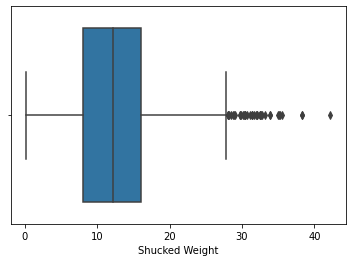

In [21]:
sb.boxplot(df['Shucked Weight'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera Weight'>

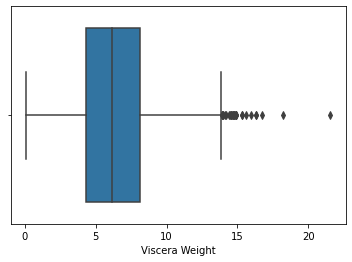

In [22]:
sb.boxplot(df['Viscera Weight'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shell Weight'>

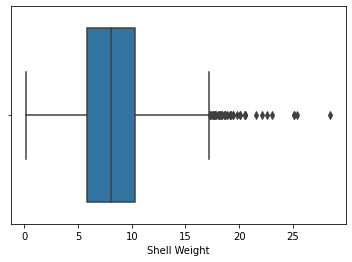

In [23]:
sb.boxplot(df['Shell Weight'])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

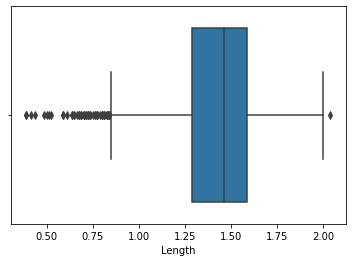

In [24]:
sb.boxplot(df['Length'])

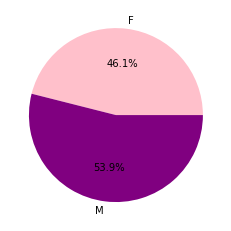

In [25]:
color=['pink', 'purple', 'cyan', 'black']
group_by_diag = df.groupby("Sex").count().reset_index()
sizes = group_by_diag['Age']
labels = group_by_diag['Sex']
plt.pie(sizes , labels= labels, autopct='%1.1f%%', colors=color)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

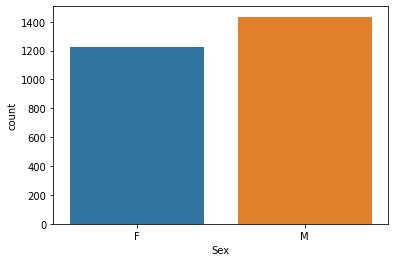

In [26]:
sb.countplot( x= "Sex" , data = df)


Text(0.5, 1.0, 'age')

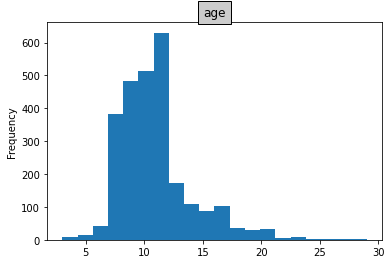

In [27]:
df['Age'].plot(kind='hist', bins =20 )
plt.title("age", bbox={'facecolor':'0.8', 'pad':5})

<AxesSubplot:ylabel='Frequency'>

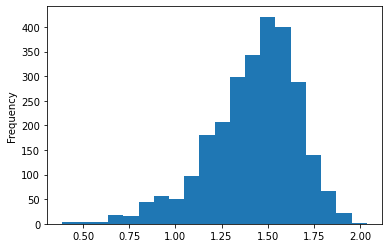

In [28]:
df['Length'].plot(kind='hist' , bins=20)

<AxesSubplot:ylabel='Frequency'>

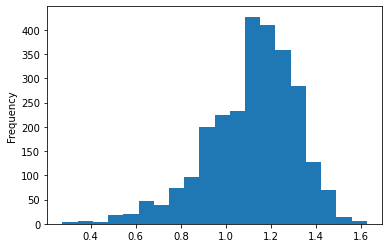

In [29]:
df['Diameter'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

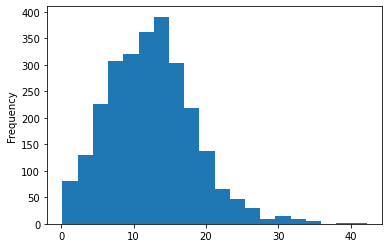

In [30]:
df['Shucked Weight'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

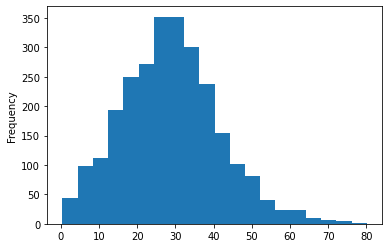

In [31]:
df['Weight'].plot(kind='hist' , bins=20)

<AxesSubplot:ylabel='Frequency'>

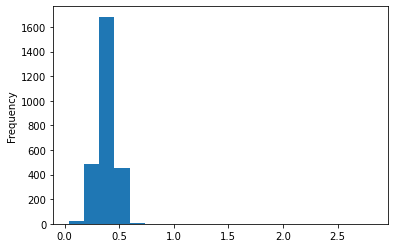

In [32]:
df['Height'].plot(kind='hist' ,bins=20 )

<AxesSubplot:ylabel='Frequency'>

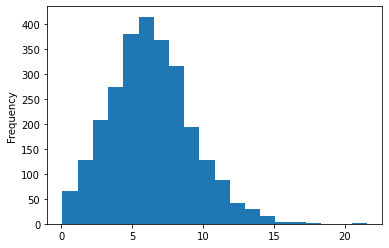

In [33]:
df['Viscera Weight'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

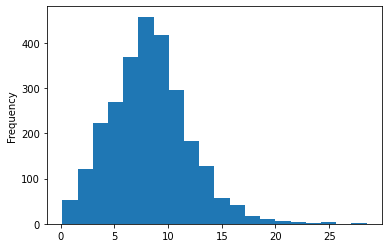

In [34]:
df['Shell Weight'].plot(kind='hist' , bins=20)

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

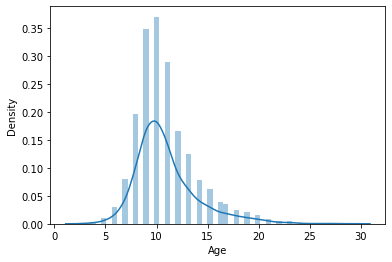

In [35]:
sb.distplot(df["Age"] )

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

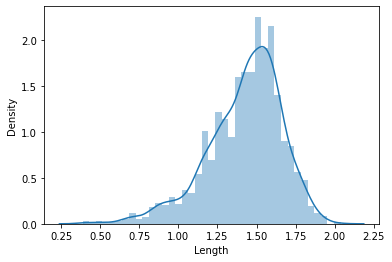

In [36]:
sb.distplot(df["Length"])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

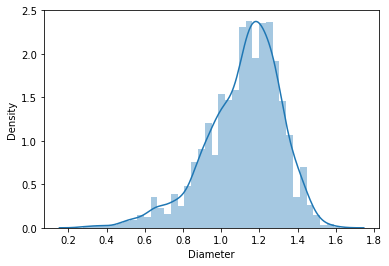

In [37]:
sb.distplot(df["Diameter"])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shucked Weight', ylabel='Density'>

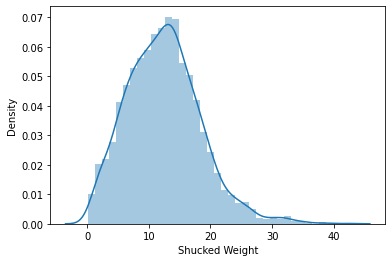

In [38]:
sb.distplot(df["Shucked Weight"])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

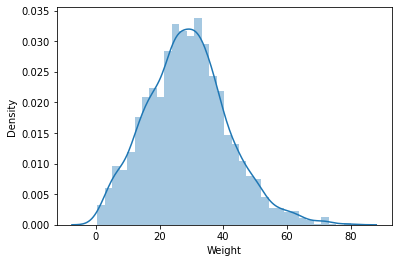

In [39]:
sb.distplot(df["Weight"])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

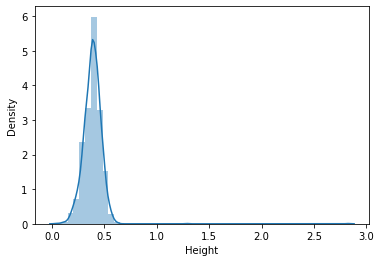

In [40]:
sb.distplot(df["Height"])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Viscera Weight', ylabel='Density'>

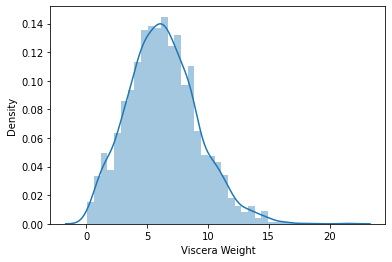

In [41]:
sb.distplot(df["Viscera Weight"])

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shell Weight', ylabel='Density'>

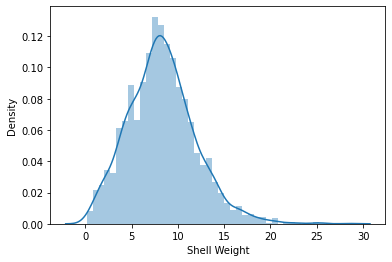

In [42]:
sb.distplot(df["Shell Weight"])

In [43]:
#sb.histplot(df["Length"])

In [44]:
#sb.histplot(df["Diameter"])

In [45]:
#sb.histplot(df["Shucked Weight"])

In [46]:
#sb.histplot(df["Weight"])

In [47]:
#sb.histplot(df["Height"])

In [48]:
#sb.histplot(df["Viscera Weight"] )

In [49]:
LQ1 = np.percentile(df['Length'], 25,
                   interpolation = 'midpoint')
print(LQ1)
 
LQ3 = np.percentile(df['Length'], 75,
                   interpolation = 'midpoint')
print(LQ3)
LIQR = LQ3 - LQ1
print(LIQR)

1.2875
1.5875
0.2999999999999998


In [50]:
DQ1 = np.percentile(df['Diameter'], 25,
                   interpolation = 'midpoint')
print(DQ1)
 
DQ3 = np.percentile(df['Diameter'], 75,
                   interpolation = 'midpoint')
print(DQ3)
DIQR = DQ3 - DQ1
print(DIQR)

1.0
1.25
0.25


In [51]:
HQ1 = np.percentile(df['Height'], 25,
                   interpolation = 'midpoint')
print(HQ1)
 
HQ3 = np.percentile(df['Height'], 75,
                   interpolation = 'midpoint')
print(HQ3)
HIQR = HQ3 - HQ1
print(HIQR)

0.3375
0.4375
0.09999999999999998


In [52]:
WQ1 = np.percentile(df['Weight'], 25,
                   interpolation = 'midpoint')
print(WQ1)
 
WQ3 = np.percentile(df['Weight'], 75,
                   interpolation = 'midpoint')
print(WQ3)
WIQR = WQ3 - WQ1
print(WIQR)

19.851737375
36.563767625
16.712030249999998


In [53]:
Q1 = np.percentile(df['Shucked Weight'], 25,
                   interpolation = 'midpoint')
print(Q1)
 
Q3 = np.percentile(df['Shucked Weight'], 75,
                   interpolation = 'midpoint')
print(Q3)
IQR = Q3 - Q1
print(IQR)

8.09378225
16.067079125
7.973296874999999


In [54]:
Q1 = np.percentile(df['Viscera Weight'], 25,
                   interpolation = 'midpoint')
print(Q1)
 
Q3 = np.percentile(df['Viscera Weight'], 75,
                   interpolation = 'midpoint')
print(Q3)
IQR = Q3 - Q1
print(IQR)

4.32329875
8.1363065
3.8130077499999997


In [55]:
Q1 = np.percentile(df['Shell Weight'], 25,
                   interpolation = 'midpoint')
print(Q1)
 
Q3 = np.percentile(df['Shell Weight'], 75,
                   interpolation = 'midpoint')
print(Q3)
IQR = Q3 - Q1
print(IQR)

5.804560125
10.3475675
4.543007375


In [56]:
zage=stats.zscore(df.Age)

In [57]:
zage

0      -0.626186
1      -1.607137
3      -0.299202
5      -0.953170
6       1.335716
          ...   
3885   -1.280154
3886   -0.626186
3887    0.027781
3888   -0.953170
3889   -0.299202
Name: Age, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

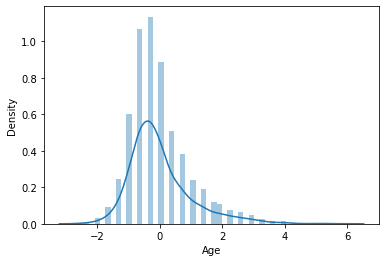

In [58]:
sb.distplot(zage)

In [59]:
zlength=stats.zscore(df.Length)

In [60]:
zlength

0       0.056665
1      -2.242133
3      -1.040489
5       0.526873
6      -0.518035
          ...   
3885   -0.988243
3886   -0.413544
3887    1.362800
3888    0.161155
3889    0.526873
Name: Length, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

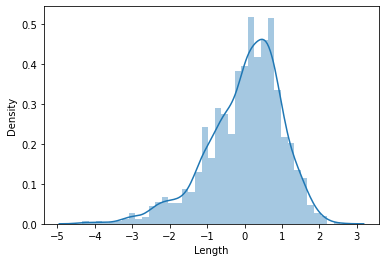

In [61]:
sb.distplot(zlength)

In [62]:
zdiameter=stats.zscore(df.Diameter)

In [63]:
zdiameter

0       0.298727
1      -2.368404
3      -1.161845
5       0.235224
6      -0.590317
          ...   
3885   -0.844329
3886   -0.463310
3887    1.314778
3888    0.108218
3889    0.489237
Name: Diameter, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

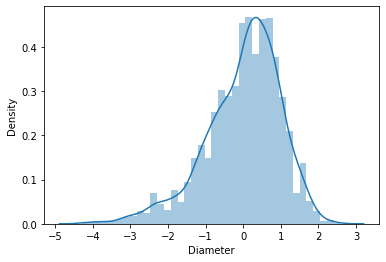

In [64]:
sb.distplot(zdiameter)

In [65]:
zhieght=stats.zscore(df.Height)

In [66]:
zhieght

0       0.280664
1      -1.846683
3      -1.447806
5      -0.384132
6      -0.650050
          ...   
3885   -0.517091
3886   -0.251173
3887    0.413623
3888   -0.650050
3889    0.546582
Name: Height, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

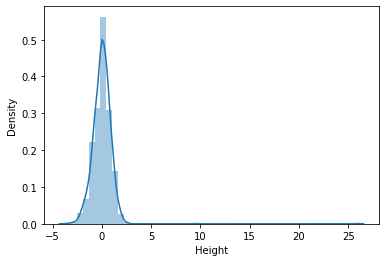

In [67]:
sb.distplot(zhieght)

In [68]:
zwieght=stats.zscore(df.Weight)

In [69]:
zwieght

0      -0.326218
1      -1.826744
3      -1.196456
5      -0.012180
6      -0.866938
          ...   
3885   -1.173235
3886   -0.422419
3887    1.476183
3888   -0.311843
3889    0.440079
Name: Weight, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

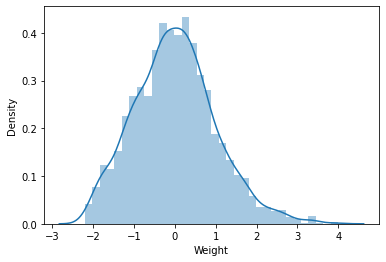

In [70]:
sb.distplot(zwieght)

In [71]:
zSHwieght=stats.zscore(df['Shucked Weight'])

In [72]:
zSHwieght

0      -0.014988
1      -1.690753
3      -1.281279
5       0.193299
6      -1.056424
          ...   
3885   -1.252876
3886   -0.299016
3887    1.492727
3888   -0.128599
3889    0.505730
Name: Shucked Weight, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shucked Weight', ylabel='Density'>

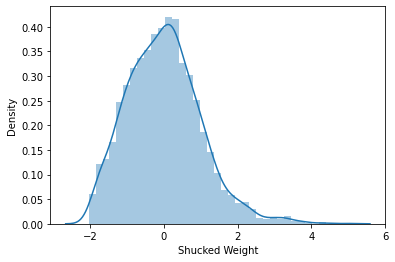

In [73]:
sb.distplot(zSHwieght)

In [74]:
zVSwieght=stats.zscore(df['Viscera Weight'])

In [75]:
zVSwieght


0      -0.250757
1      -1.712521
3      -1.397528
5       0.157750
6      -0.157243
          ...   
3885   -1.500885
3886   -0.181852
3887    1.023981
3888   -0.157243
3889    0.300481
Name: Viscera Weight, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Viscera Weight', ylabel='Density'>

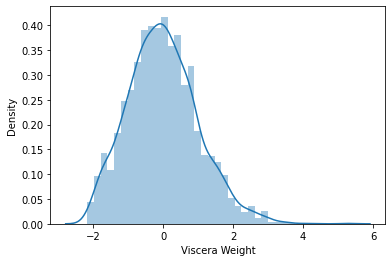

In [76]:
sb.distplot(zVSwieght)

In [77]:
zShellwieght=stats.zscore(df['Shell Weight'])

In [78]:
zShellwieght

0      -0.415509
1      -1.839895
3      -0.828036
5      -0.283189
6      -0.944789
          ...   
3885   -0.828036
3886   -0.361024
3887    0.222741
3888   -0.516695
3889    0.417329
Name: Shell Weight, Length: 2660, dtype: float64

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shell Weight', ylabel='Density'>

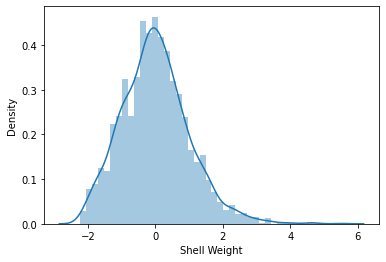

In [79]:
sb.distplot(zShellwieght)

<AxesSubplot:xlabel='Length'>

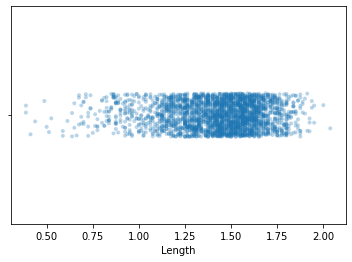

In [80]:
sb.stripplot(x='Length',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Diameter'>

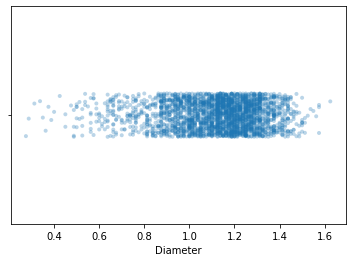

In [81]:
sb.stripplot(x='Diameter',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Height'>

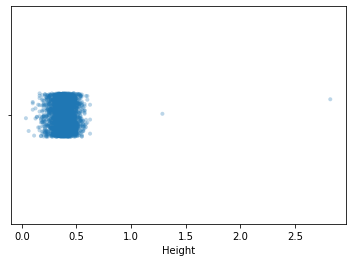

In [82]:
sb.stripplot(x='Height',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Weight'>

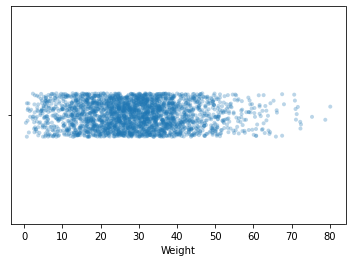

In [83]:
sb.stripplot(x='Weight',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Shucked Weight'>

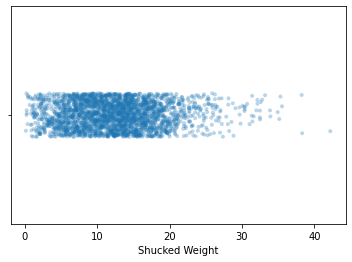

In [84]:
sb.stripplot(x='Shucked Weight',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Viscera Weight'>

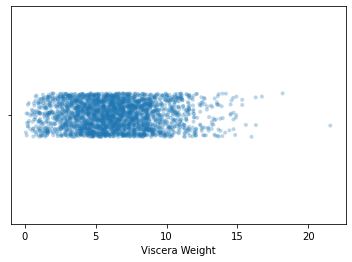

In [85]:
sb.stripplot(x='Viscera Weight',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Shell Weight'>

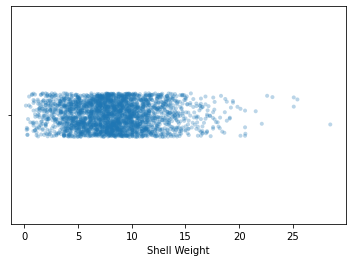

In [86]:
sb.stripplot(x='Shell Weight',data=df,alpha=.3,size=4)

<AxesSubplot:xlabel='Age'>

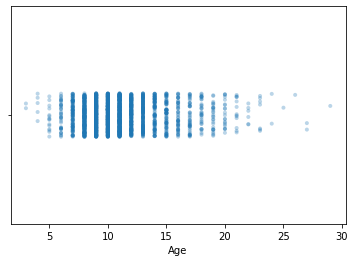

In [87]:
sb.stripplot(x='Age',data=df,alpha=.3,size=4)

In [88]:
dfOut3=df[df.Weight>(WQ3 + 1.5 * WIQR)]
dfOut3.Weight

84      67.500159
229     72.432973
501     71.610837
538     72.234526
610     62.950065
748     62.652395
772     78.797435
853     63.375307
1142    63.786375
1204    70.661129
1291    65.870063
1326    71.114721
1485    63.928123
1555    64.169093
1609    67.982101
1757    71.313167
1812    62.212978
1949    62.652395
2061    65.260549
2316    66.068510
2387    63.389482
2484    62.397250
2571    75.324622
2716    72.291225
2725    62.354725
2838    64.339190
2896    80.101512
3069    61.901133
3185    71.015497
3196    67.500159
3350    66.139383
3555    64.438413
3681    63.105987
3815    70.845400
Name: Weight, dtype: float64

In [89]:
dfOut2=df[df.Weight< (WQ1 - 1.5 * WIQR)]
dfOut2.Weight

Series([], Name: Weight, dtype: float64)

In [90]:
dfOut5=df[df.Length>(LQ3 + 1.5 * LIQR)]
dfOut5.Length

1485    2.0375
Name: Length, dtype: float64

In [91]:
dfOut6=df[df.Length< (LQ1 - 1.5 * LIQR)]
dfOut6.Length

10      0.8250
70      0.7000
115     0.6750
122     0.6875
250     0.7625
         ...  
3395    0.8250
3406    0.7250
3550    0.8000
3844    0.5875
3854    0.6500
Name: Length, Length: 63, dtype: float64

In [92]:
dfOut5=df[df.Diameter>(DQ3 + 1.5 * DIQR)]
dfOut5.Diameter

Series([], Name: Diameter, dtype: float64)

In [93]:
dfOut6=df[df.Diameter< (DQ1 - 1.5 * DIQR)]
dfOut6.Diameter

10      0.5375
70      0.5125
115     0.4875
122     0.5125
250     0.5750
591     0.6000
624     0.4875
670     0.5375
693     0.2875
791     0.4750
825     0.5250
845     0.5625
850     0.4875
896     0.4875
901     0.3500
931     0.5875
1031    0.6125
1098    0.5000
1132    0.4500
1225    0.5250
1245    0.5625
1289    0.3625
1351    0.3750
1416    0.5500
1523    0.5000
1660    0.3875
1681    0.5625
1685    0.6000
1703    0.6125
2076    0.5250
2090    0.5625
2218    0.5875
2299    0.5750
2558    0.5250
2598    0.5750
2610    0.6000
2627    0.4500
2638    0.4000
2765    0.2750
2835    0.3125
2889    0.5000
2958    0.5875
3040    0.5625
3137    0.3375
3178    0.5625
3182    0.5375
3225    0.6125
3278    0.5000
3381    0.6000
3406    0.5750
3550    0.6000
3695    0.5875
3844    0.4250
3854    0.5000
Name: Diameter, dtype: float64

In [94]:
dfOut5=df[df.Height>(HQ3 + 1.5 * HIQR)]
dfOut5.Height

748     1.2875
772     0.6250
776     0.6000
1326    0.5875
1331    0.5875
1485    0.6250
1949    0.6000
2038    0.5875
2256    2.8250
2588    0.6250
2725    0.6000
3055    0.5875
Name: Height, dtype: float64

In [95]:
dfOut6=df[df.Height< (HQ1 - 1.5 * HIQR)]
dfOut6.Height

10      0.1875
122     0.1750
624     0.1750
670     0.1875
693     0.0625
791     0.1875
825     0.1875
845     0.1875
850     0.1750
896     0.1625
901     0.1375
931     0.1500
1127    0.1625
1132    0.1625
1245    0.1875
1257    0.1875
1289    0.1250
1351    0.1250
1416    0.1750
1660    0.1125
1898    0.1875
2076    0.1875
2090    0.1750
2558    0.1625
2627    0.1625
2638    0.1500
2765    0.1000
2835    0.1000
2889    0.1625
3137    0.1000
3140    0.1875
3182    0.1875
3225    0.1875
3349    0.1625
3381    0.1875
3406    0.1875
3542    0.0375
3844    0.1375
3854    0.1625
Name: Height, dtype: float64

In [96]:
AgeRange=df.Age.max()-df.Age.min()
print("Range of Age =",AgeRange)

Range of Age = 26


In [97]:
ShellWeightRange=df['Shell Weight'].max()-df['Shell Weight'].min()
print("Range of Shell Weight =",ShellWeightRange)

Range of Shell Weight = 28.3495


In [98]:
VisceraWeightRange=df['Viscera Weight'].max()-df['Viscera Weight'].min()
print("Range of Viscera Weight =",VisceraWeightRange)

Range of Viscera Weight = 21.4605715


In [99]:
ShuckedWeightRange=df['Shucked Weight'].max()-df['Shucked Weight'].min()
print("Range of Shucked Weight =",ShuckedWeightRange)

Range of Shucked Weight = 41.99978425


In [100]:
WeightRange=df.Weight.max()-df.Weight.min()
print("Range of Weight =",WeightRange)

Range of Weight = 79.662095


In [101]:
HeightRange=df.Height.max()-df.Height.min()
print("Range of Height =",HeightRange)

Range of Height = 2.7875


In [102]:
DiameterRange=df.Diameter.max()-df.Diameter.min()
print("Range of Diameter =",DiameterRange)

Range of Diameter = 1.35


In [103]:
LengthRange=df.Length.max()-df.Length.min()
print("Range of Length =",LengthRange)

Range of Length = 1.6500000000000001


In [104]:
x = df['Shell Weight']
y = df['Age']

In [105]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    b1_num = ((x - x_mean) * (y - y_mean)).sum() #lec 3 slide 70
    b1_den = ((x - x_mean)**2).sum()
    b1 = b1_num / b1_den
    
    b0 = y_mean - (b1*x_mean)
    
    reg_line ='y = {} + {}β'.format(b0, round(b1, 3))
    
    return (b0, b1, reg_line)

In [106]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [107]:
def predict(b0, b1, new_x):
    yhat = b0 + b1 * new_x
    return yhat

In [108]:
def Error (y,predict):
    Error=abs(y-predict)
    return Error

In [109]:
linear_regression(x, y)

(7.724845227392523, 0.38619543350878155, 'y = 7.724845227392523 + 0.386β')

In [110]:
b0, b1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('Coefficient of determination: ', R**2)

Regression Line:  y = 7.724845227392523 + 0.386β
Correlation Coef.:  0.45994092184075985
Coefficient of determination:  0.21154565158372796


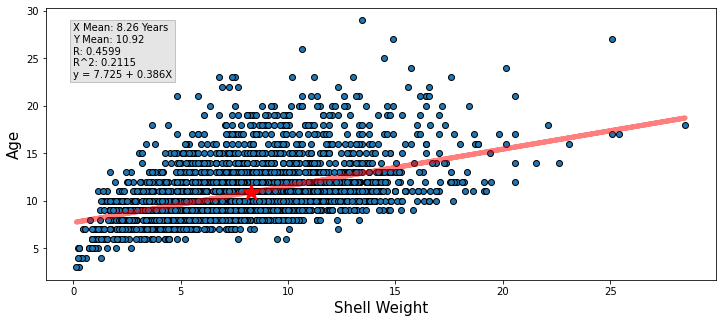

In [111]:
plt.figure(figsize=(12,5))
plt.scatter(x, y,  linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: {}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(b0, 3),
                       round(b1, 3))
plt.text(x=0, y=23, s=text, fontsize=10, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 3})
plt.xlabel('Shell Weight', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.plot(x, b0 + b1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [112]:
predict(b0,b1,x)

0       10.330576
1        8.327010
3        9.750308
5       10.516699
6        9.586081
          ...    
3885     9.750308
3886    10.407215
3887    11.228348
3888    10.188246
3889    11.502060
Name: Shell Weight, Length: 2660, dtype: float64

In [113]:
Error(y,predict(b0,b1,x))

0       1.330576
1       2.327010
3       0.249692
5       2.516699
6       5.413919
          ...   
3885    2.750308
3886    1.407215
3887    0.228348
3888    2.188246
3889    1.502060
Length: 2660, dtype: float64

In [114]:
df.var()

C:\Users\pc\AppData\Local\Temp/ipykernel_22200/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Length              0.057265
Diameter            0.038761
Height              0.008842
Weight            164.386688
Shucked Weight     35.878530
Viscera Weight      8.297596
Shell Weight       13.270916
Age                 9.356449
dtype: float64